In [1]:
import sys
import pickle
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
sys.path.append('C:\\DATA_SCIENCE')
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, RobustScaler, Normalizer, PolynomialFeatures, MinMaxScaler
from LIBRARY.Libreria_Folders_DVG import *
from LIBRARY.Libreria_Pandas_DVG import *
from LIBRARY.Libreria_ML_DVG import *
from LIBRARY.Libreria_Maths_DVG import *
from LIBRARY.Libreria_Graphs_DVG import *


In [2]:
df = barr_add('C:\DATA_SCIENCE\MACHINE_LEARNING\Competition_Kaggle_05_02_21\diamonds_train.csv')

In [3]:
df= pd.read_csv(df)

In [4]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,20172.000000,0.795652,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,11646.742642,0.470806,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,10086.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,20172.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,30258.000000,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,40344.000000,4.010000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


In [5]:
#     #there are many values that equal 0 and have no sense

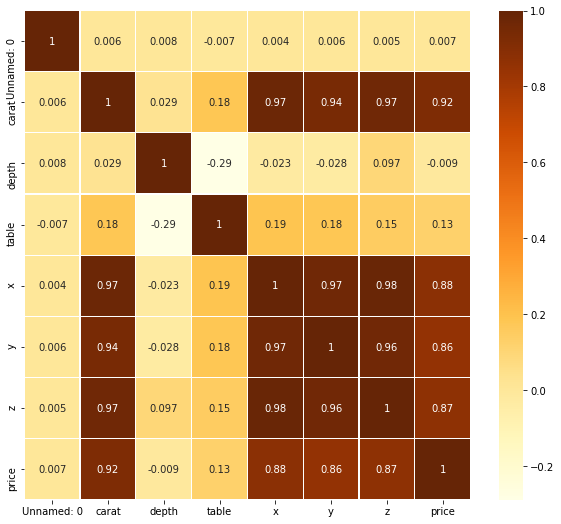

In [6]:
corr_visual(df)

In [7]:
df = df.drop(columns=['x', 'y', 'z'])   #not correlated, and duplicated in "table" column.

In [8]:
df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'])

In [9]:
#encoder(df)

In [10]:
lgr = LinearRegression(n_jobs=-2)

In [11]:
X = np.array(df[df.columns.difference(['Unnamed: 0', 'price'])])
y = np.array(df['price'])

In [12]:
#seed_ranker(X, y, 7500, lgr)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=3601)

In [14]:
lgr.fit(X_train, y_train)

LinearRegression(n_jobs=-2)

In [15]:
y_pred = lgr.predict(X_test)

In [16]:
print('RMSE:',mean_squared_error(y_test, y_pred, squared=False))

RMSE: 1079.4416960378128


In [17]:
lgr.fit(X, y)

LinearRegression(n_jobs=-2)

In [18]:
pickle.dump(lgr, open('lgr_DUM_DEF.sav', 'wb'))

In [19]:
to_pred = pd.read_csv("diamonds_test.csv")

In [20]:
to_pred = to_pred.drop(columns=['x', 'y', 'z'])

In [21]:
to_pred = pd.get_dummies(to_pred, columns=['cut', 'color', 'clarity'])

In [22]:
#encoder(to_pred)

In [23]:
X2 = np.array(to_pred[to_pred.columns.difference(['Unnamed: 0', 'price'])])

In [24]:
predictions_submit = lgr.predict(X2)

In [25]:
predictions_submit = predictions_submit

In [26]:
submission = pd.DataFrame({"id": to_pred["Unnamed: 0"], "price": predictions_submit})
submission

,id,price
0,0,-2054.50
1,1,2020.75
2,2,10286.75
3,3,-434.75
4,4,10363.00
...,...,...
13444,13444,5362.25
13445,13445,-83.00
13446,13446,11053.25
13447,13447,10967.25


In [27]:
sample = pd.read_csv("sample_submission.csv")

In [28]:
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("to_submit7.csv", index = False)

you're ready to submit!


In [29]:
"""x = np.array([5, 8 , 12, 15])         

#Using Sklearn
normalizer_x = preprocessing.Normalizer(norm = "l2").fit(x)
x_norm = normalizer_x.transform(x)[0]
print x_norm

>array([ 0.23363466,  0.37381545,  0.56072318,  0.70090397])""" #NORMALIZE-----------------

'x = np.array([5, 8 , 12, 15])         \n\n#Using Sklearn\nnormalizer_x = preprocessing.Normalizer(norm = "l2").fit(x)\nx_norm = normalizer_x.transform(x)[0]\nprint x_norm\n\n>array([ 0.23363466,  0.37381545,  0.56072318,  0.70090397])'

In [30]:
"""#Manually
w = np.sqrt(sum(x**2))
x_norm2 = x/w
print x_norm2

>array([ 0.23363466,  0.37381545,  0.56072318,  0.70090397])""" #MANUAL NORMALIZE----------------

"""So turning them "back" to the raw formate is simple by multiplying with "w".""" # UNDO NORMALIZE--------------------------


'So turning them "back" to the raw formate is simple by multiplying with "w".'